<a href="https://colab.research.google.com/github/ginsawmor/PUS2020_GSM/blob/HW2/PUS2020_HW2_GSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2 : Summary statistics

this homework performs strictly an exploratory analysis of the data

Consult the https://www.cin.ufpe.br/~embat/Python%20for%20Data%20Analysis.pdf Python for Data Analysis book (pandas book) chapter 7 or this digital rendition of its content here https://github.com/fedhere/PUS2020_FBianco/blob/master/HW2/PandasCh7.ipynb. 

Also use the code examples in the folder classdemo https://github.com/fedhere/PUS2020_FBianco/tree/master/classdemo

**important**
turn in the notebook by uploading it to your github repository in a folder called HW2. Before you uploade the notebook make sure you 
- click above: Runtime -> Restart and run all

this will assure that your notebook has not bugs due to running the cells of code out of order.


In [1]:
# you should only need the packathon pandas
import pandas as pd

## Read in the data about the Philly parks 
you can find the data at 
http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv")

In [5]:
pparks = pd.read_csv("http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv")

In [32]:
pparks

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,NaN,1903,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...",400-16 S TANEY ST;Pine & Taney;338-46 S 26TH S...,3.379158,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,Y,NaN,23295.664062,892.868012
1,2,Schuylkill Banks,Schuylkill Banks,N,NaN,Schuylkill Banks,NaN,2794,400 S TANEY ST,19103,NaN,400-16 S TANEY ST,14.717314,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,7,"5, 7","2, 5","9, 17",Y,Y,N,Bill 160113 (4/14/16) -South of South St Bridge,101477.179688,9300.670289
2,3,Schuylkill River Park,Schuylkill River Park,N,NaN,Schuylkill River Park,NaN,2992,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...","Pine & Taney;400-16 S TANEY ST, 338-46 S 26TH ...",7.327000,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,N,NaN,50512.582031,1259.304657
3,4,Frankford Boat Launch,Frankford Boat Launch,N,Frankford Boat Launch,Frankford Boat Launch,PA Fish & Boat;Frankford Arsenal Boat Launch,3090,5625 TACONY ST,19137,5625 TACONY ST,5650 Tacony St,19.398075,NEIGHBORHOOD_PARK,BOATHOUSE_LAUNCH,2,2,6,15,Y,Y,N,NaN,133961.171875,1641.529044
4,5,Orthodox Street Park,Orthodox Street Park,N,NaN,Orthodox,Orthodox Street Parcel; Bridesburg Riverfront ...,3091,3101 ORTHODOX ST,19137,3101 ORTHODOX ST,NaN,16.229629,NEIGHBORHOOD_PARK,UNDEVELOPED,5,2,6,15,Y,Y,N,Officially acquired from PAID in 10/2019. Doc ...,112026.734375,1679.085206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,Sedgely and Fletcher Warehouse,Sedgely and Fletcher Warehouse,N,NaN,Sedgely Warehouse,Sedgley Storeroom;Maintenance Warehouse,99999,2528 W SEDGLEY AVE,19132,2528-34 W SEDGLEY AVE,W Sedgley Ave & N 26th St;2528-34 W SEDGLEY AVE,0.773902,NEIGHBORHOOD_PARK,OPERATIONS,6,6,5,22,N,Y,N,School District leases to PPR.,5341.640625,356.178092
518,519,Fox Chase - Lorimer Trail Greenway (Rhawn),Fox Chase - Lorimer Trail Greenway (Rhawn),N,NaN,Fox Chase - Lorimer Greenway,NaN,99999,439 RHAWN ST,19111,NaN,Rhawn St and Elberon Ave;8217 BURHOLME AVE,3.589356,NEIGHBORHOOD_PARK,UNDEVELOPED,1,1,10,7,Y,Y,N,No Public Access. Undeveloped Land awaiting Fo...,24840.667969,2152.448099
519,520,Bartrams Mile Trail Greenway,Bartrams Mile Trail Greenway,N,NaN,Bartrams Trail Greenway,Bartram's Mile; Bartrams South,0,NaN,19143,NaN,NaN,9.217030,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,9,8,3,"12,18",Y,N,N,In Development,63509.933594,2635.375719
520,521,Loretto and Gilham Triangle,Loretto and Gilham Triangle,N,NaN,Loretto and Gilham,Cranford Ave andd Magee Ave Traffic Island; No...,245,1385 GILHAM ST,19111,Registry - 144N070092,6540 LORETTO AVE,0.161596,POCKET_PARK,BREEZEWAY_ISLAND,1,2,9,2,Y,Y,N,NaN,1116.867188,144.694698


In [33]:
# show the shape of the parks file dataframe
pparks.shape

(522, 25)

In [6]:
# show the column names in the dataframe
print(pparks.columns)

Index(['OBJECTID', 'PUBLIC_NAME', 'PARENT_NAME', 'NESTED', 'OFFICIAL_NAME',
       'LABEL', 'ALIAS', 'DPP_ASSET_ID', 'ADDRESS911', 'ZIPCODE',
       'ADDRESS_BRT', 'ALIAS_ADDRESS', 'ACREAGE', 'PROPERTY_CLASSIFICATION',
       'PPR_USE', 'PPR_DISTRICT', 'PPR_OPS_DISTRICT', 'COUNCIL_DISTRICT',
       'POLICE_DISTRICT', 'CITY_SCALE_MAPS', 'LOCAL_SCALE_MAPS',
       'PROGRAM_SITES', 'COMMENTS', 'Shape__Area', 'Shape__Length'],
      dtype='object')


In [9]:
# show the beginning of the dataframe (the first 5 rows)
pparks.head(5)

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,NaN,1903,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...",400-16 S TANEY ST;Pine & Taney;338-46 S 26TH S...,3.379158,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,Y,NaN,23295.664062,892.868012
1,2,Schuylkill Banks,Schuylkill Banks,N,NaN,Schuylkill Banks,NaN,2794,400 S TANEY ST,19103,NaN,400-16 S TANEY ST,14.717314,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,7,"5, 7","2, 5","9, 17",Y,Y,N,Bill 160113 (4/14/16) -South of South St Bridge,101477.179688,9300.670289
2,3,Schuylkill River Park,Schuylkill River Park,N,NaN,Schuylkill River Park,NaN,2992,400 S TANEY ST,19146,"400-16 S TANEY ST, 338-46 S 26TH ST, 300 S 26T...","Pine & Taney;400-16 S TANEY ST, 338-46 S 26TH ...",7.327000,NEIGHBORHOOD_PARK,RECREATION_SITE,7,"5, 7",2,9,Y,Y,N,NaN,50512.582031,1259.304657
3,4,Frankford Boat Launch,Frankford Boat Launch,N,Frankford Boat Launch,Frankford Boat Launch,PA Fish & Boat;Frankford Arsenal Boat Launch,3090,5625 TACONY ST,19137,5625 TACONY ST,5650 Tacony St,19.398075,NEIGHBORHOOD_PARK,BOATHOUSE_LAUNCH,2,2,6,15,Y,Y,N,NaN,133961.171875,1641.529044
4,5,Orthodox Street Park,Orthodox Street Park,N,NaN,Orthodox,Orthodox Street Parcel; Bridesburg Riverfront ...,3091,3101 ORTHODOX ST,19137,3101 ORTHODOX ST,NaN,16.229629,NEIGHBORHOOD_PARK,UNDEVELOPED,5,2,6,15,Y,Y,N,Officially acquired from PAID in 10/2019. Doc ...,112026.734375,1679.085206


In [10]:
# show the end of the dataframe (the last 5 rows)
pparks.tail(5)

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS911,ZIPCODE,ADDRESS_BRT,ALIAS_ADDRESS,ACREAGE,PROPERTY_CLASSIFICATION,PPR_USE,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
517,518,Sedgely and Fletcher Warehouse,Sedgely and Fletcher Warehouse,N,NaN,Sedgely Warehouse,Sedgley Storeroom;Maintenance Warehouse,99999,2528 W SEDGLEY AVE,19132,2528-34 W SEDGLEY AVE,W Sedgley Ave & N 26th St;2528-34 W SEDGLEY AVE,0.773902,NEIGHBORHOOD_PARK,OPERATIONS,6,6,5,22,N,Y,N,School District leases to PPR.,5341.640625,356.178092
518,519,Fox Chase - Lorimer Trail Greenway (Rhawn),Fox Chase - Lorimer Trail Greenway (Rhawn),N,NaN,Fox Chase - Lorimer Greenway,NaN,99999,439 RHAWN ST,19111,NaN,Rhawn St and Elberon Ave;8217 BURHOLME AVE,3.589356,NEIGHBORHOOD_PARK,UNDEVELOPED,1,1,10,7,Y,Y,N,No Public Access. Undeveloped Land awaiting Fo...,24840.667969,2152.448099
519,520,Bartrams Mile Trail Greenway,Bartrams Mile Trail Greenway,N,NaN,Bartrams Trail Greenway,Bartram's Mile; Bartrams South,0,NaN,19143,NaN,NaN,9.217030,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,9,8,3,"12,18",Y,N,N,In Development,63509.933594,2635.375719
520,521,Loretto and Gilham Triangle,Loretto and Gilham Triangle,N,NaN,Loretto and Gilham,Cranford Ave andd Magee Ave Traffic Island; No...,245,1385 GILHAM ST,19111,Registry - 144N070092,6540 LORETTO AVE,0.161596,POCKET_PARK,BREEZEWAY_ISLAND,1,2,9,2,Y,Y,N,NaN,1116.867188,144.694698
521,522,Rail Park,Rail Park,N,The Rail Park,Rail Park,NaN,99999,1250 NOBLE ST,19123,NaN,1136 CALLOWHILL ST,0.872112,NEIGHBORHOOD_PARK,GREENWAY_PARKWAY,10,5,1,6,Y,Y,N,Elevated former railway.,6009.941406,825.079151


## meausre the central tendency of the Philly park sizes
measure the mean and the median and compare them

In [153]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


In [152]:
meanps = pparks['ACREAGE'].mean()
meanps

23.238296223045964

In [45]:
# show the median size of the dataframe 
# are they the same? 
medianps = pparks['ACREAGE'].median()
medianps

3.59385373

what can you conclude from 
 the values of the mean and median you extracted? (discuss in a text cell below)

No; the mean and the median are not the same. The mean is much larger, which indicates that outliers may exist in these data. 

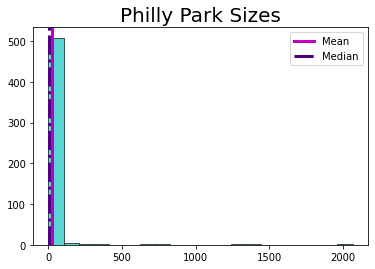

In [180]:
# visualize a histogram of the park size. 
# you can use the method of the ACREAGE column .hist()
# choose an appropriate number of bins with the argument bins=
# overplot on the histogram the mean and the median of the distribution
#ax = pparks.hist("ACREAGE", bins=20)
ax = plt.hist(pparks['ACREAGE'], bins=20, color='c', edgecolor='k', alpha=0.65)
plt.title('Philly Park Sizes', fontsize=20, loc='center')  # or size, alternatively
ax
ax_mean = plt.axvline(pparks['ACREAGE'].mean(), color='m', linestyle='solid', linewidth=3, label='Mean')
ax_median = plt.axvline(pparks['ACREAGE'].median(), color='#4B0082', linestyle='dashdot', linewidth=3, label='Median')
plt.legend()


Figure Caption: Imagine that the reader has no access to my instructions, or to the code. What does this figure show? what should the reader note about the figure? 

There are a large proportion of parks that are <500 acres in size, making the distribution positively skewed.

## what is the spread of park sizes?
calculate the standard deviation of the park sized

In [173]:
stdps = pparks['ACREAGE'].std()
stdps

131.88319179881643

## select only a subset of the parks: the pasks smaller than 10 acres
calculate the mean and median and plot a histogram of the park sized with the mean and median indicated on the plot

In [189]:
# if you need help with this step do ask me about boolean arrays used as indices
# and slicing of arrays and series! remember we have a slack channel #hw2
under10acres = pparks[pparks['ACREAGE']<10]
under10acres.describe()

,OBJECTID,DPP_ASSET_ID,ZIPCODE,ACREAGE,Shape__Area,Shape__Length
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,281.718826,4296.946210,19131.540342,2.907951,20068.589911,635.927726
std,137.111775,15964.546709,13.442833,2.639460,18210.164104,615.104146
min,1.000000,0.000000,19102.000000,0.019246,132.773438,57.986107
25%,181.000000,749.000000,19122.000000,0.585904,4038.718750,292.674707
50%,284.000000,1848.000000,19132.000000,2.059850,14207.468750,569.081402
75%,386.000000,2803.000000,19143.000000,4.752239,32793.003906,828.893334
max,522.000000,99999.000000,19154.000000,9.785307,67480.699219,9101.830262


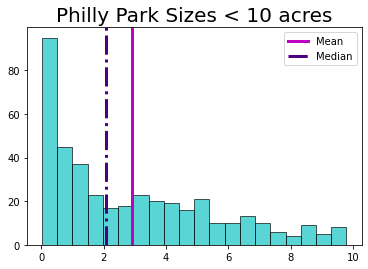

In [188]:
# visualize a histogram of the park size. 
# you can use the method of the ACREAGE column .hist()
# choose an appropriate number of bins with the argument bins=
# overplot on the histogram the mean and the median of the distribution
#ax = pparks.hist("ACREAGE", bins=20)
ax2 = plt.hist(under10acres['ACREAGE'], bins=20, color='c', edgecolor='k', alpha=0.65)
plt.title('Philly Park Sizes < 10 acres', fontsize=20, loc='center')  # or size, alternatively
ax
ax2_mean = plt.axvline(under10acres['ACREAGE'].mean(), color='m', linestyle='solid', linewidth=3, label='Mean')
ax2_median = plt.axvline(under10acres['ACREAGE'].median(), color='#4B0082', linestyle='dashdot', linewidth=3, label='Median')
plt.legend()


Figure Caption: Imagine that the reader has no access to my instructions, or to the code. What does this figure show? what should the reader note about the figure?

The distribution is positively skewed with a large proportion of parks with acreage < 1. 


# Challenge

the parks listed in each row are in some cases subsets of larger parks. The "parent" park is listed under PARENT_NAME. 

The challenge is to visualize the distribution of sizes of the  parent parks. To do that you have to aggregate the parks based on the "PARENT_NAME" value and sum the size of the parks. The methods of the dataframe you want to use are 
```.groupby()```
and 
```.sum()```

In [ ]:
ax = pparks.groupby(...


Figure caption (make sure you describe the differences!)

What could you measure about this new dataset obtained by grouping the data by PARENT_NAME that would allow you to investigate further the difference in the two dataset? 